In [11]:
#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("andrewmvd/lung-and-colon-cancer-histopathological-images")

#print("Path to dataset files:", path)

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
!unzip /content/drive/MyDrive/omesh/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc10.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc100.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1000.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1001.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1002.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1003.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1004.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1005.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1006.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1007.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1008.jpeg  
  inflating: lung_c

In [14]:
path = os.path.join(os.getcwd(), 'lung_colon_image_set')

In [15]:
path

'/content/lung_colon_image_set'

In [16]:
import os
object_list = os.listdir(path)
print(object_list)

['lung_image_sets', 'colon_image_sets']


In [17]:
colon_images = os.path.join(path, 'colon_image_sets')

In [18]:
os.listdir(colon_images)

['colon_aca', 'colon_n']

In [19]:
lung_images = os.path.join(path, 'lung_image_sets')

In [20]:
os.listdir(lung_images)

['lung_scc', 'lung_aca', 'lung_n']

In [21]:
!cp -rf /content/lung_colon_image_set/colon_image_sets/* /content/lung_colon_image_set/lung_image_sets

In [22]:
os.listdir(lung_images)

['colon_aca', 'colon_n', 'lung_scc', 'lung_aca', 'lung_n']

In [23]:
os.listdir(lung_images + '/colon_aca')

['colonca2043.jpeg',
 'colonca1982.jpeg',
 'colonca766.jpeg',
 'colonca1047.jpeg',
 'colonca1656.jpeg',
 'colonca2145.jpeg',
 'colonca4694.jpeg',
 'colonca2788.jpeg',
 'colonca4943.jpeg',
 'colonca3552.jpeg',
 'colonca2092.jpeg',
 'colonca1810.jpeg',
 'colonca217.jpeg',
 'colonca1176.jpeg',
 'colonca4394.jpeg',
 'colonca1043.jpeg',
 'colonca2208.jpeg',
 'colonca3598.jpeg',
 'colonca4583.jpeg',
 'colonca4647.jpeg',
 'colonca4878.jpeg',
 'colonca2061.jpeg',
 'colonca2333.jpeg',
 'colonca1712.jpeg',
 'colonca1781.jpeg',
 'colonca3821.jpeg',
 'colonca1118.jpeg',
 'colonca2032.jpeg',
 'colonca1786.jpeg',
 'colonca267.jpeg',
 'colonca453.jpeg',
 'colonca3414.jpeg',
 'colonca406.jpeg',
 'colonca1835.jpeg',
 'colonca4787.jpeg',
 'colonca704.jpeg',
 'colonca2413.jpeg',
 'colonca1333.jpeg',
 'colonca4796.jpeg',
 'colonca2594.jpeg',
 'colonca3759.jpeg',
 'colonca2578.jpeg',
 'colonca3792.jpeg',
 'colonca2943.jpeg',
 'colonca2325.jpeg',
 'colonca147.jpeg',
 'colonca1484.jpeg',
 'colonca2970.jpeg',

In [24]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
import keras

os.environ["KERAS_BACKEND"] = "tensorflow"
from keras import layers
from keras import ops
from keras.utils import load_img
import tensorflow as tf

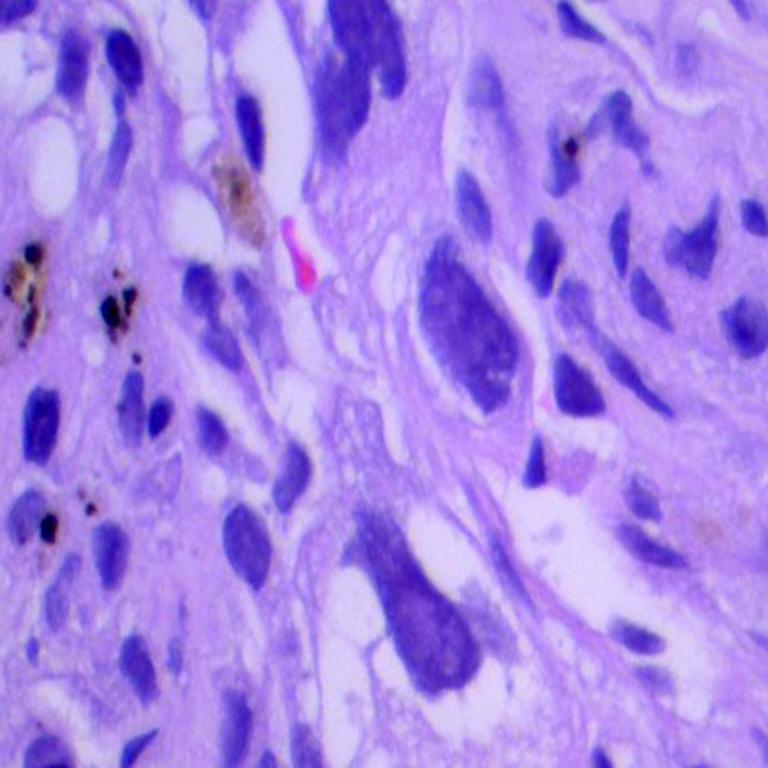

In [25]:
tf.keras.utils.load_img("/content/lung_colon_image_set/lung_image_sets/lung_aca/lungaca1448.jpeg")

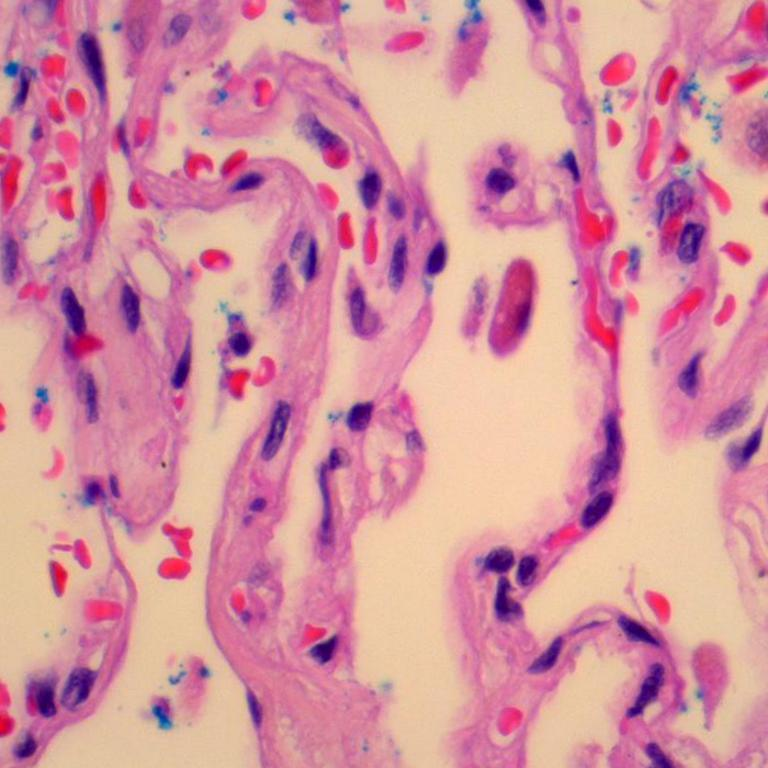

In [26]:
tf.keras.utils.load_img("/content/lung_colon_image_set/lung_image_sets/lung_n/lungn1441.jpeg")

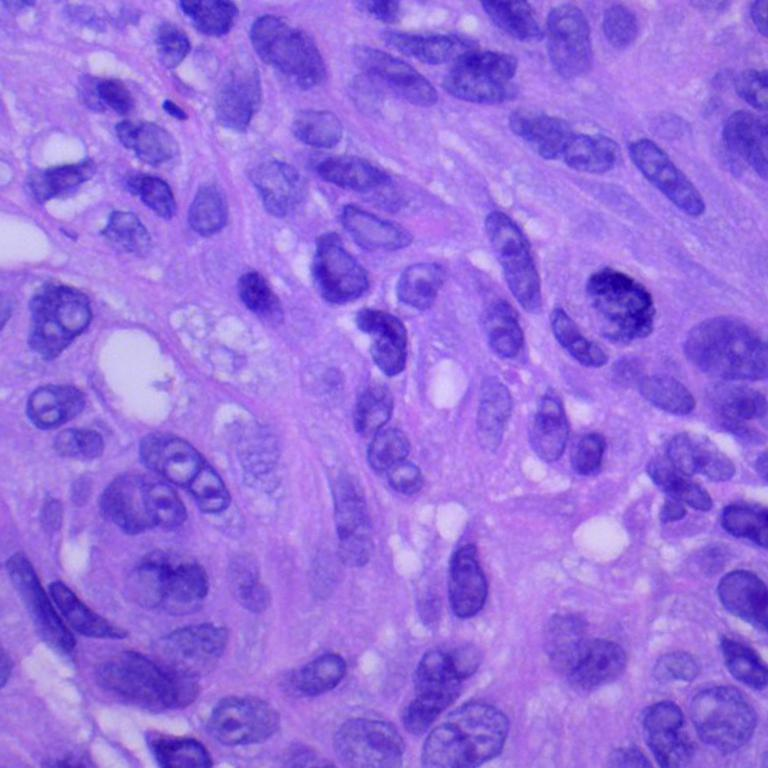

In [27]:
tf.keras.utils.load_img("/content/lung_colon_image_set/lung_image_sets/lung_scc/lungscc101.jpeg")

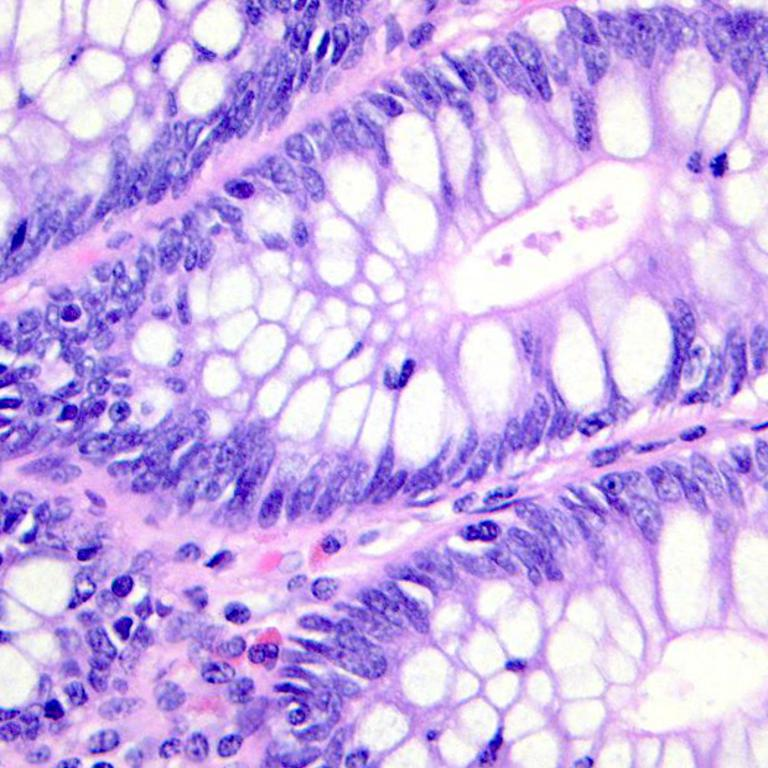

In [28]:
tf.keras.utils.load_img("/content/lung_colon_image_set/colon_image_sets/colon_n/colonn1369.jpeg")

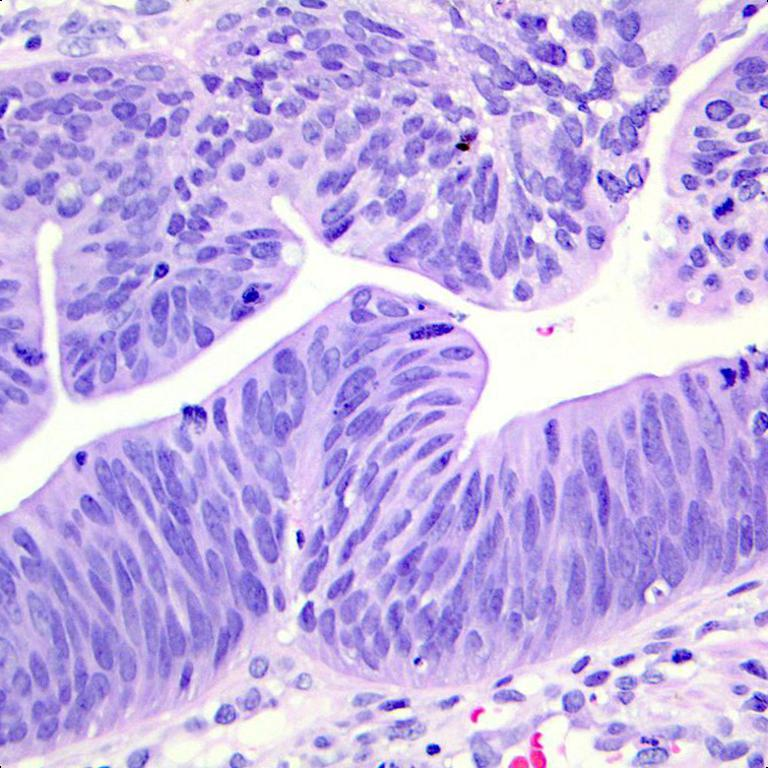

In [29]:
tf.keras.utils.load_img("/content/lung_colon_image_set/lung_image_sets/colon_aca/colonca1135.jpeg")

In [30]:
BATCH = 16
IMG_SIZE = (72, 72)

In [31]:
train_ds=tf.keras.utils.image_dataset_from_directory(lung_images,
                                                    subset='training',
                                                    seed=123,
                                                    validation_split=0.3,
                                                    batch_size=BATCH,
                                                    image_size=IMG_SIZE)

Found 25000 files belonging to 5 classes.
Using 17500 files for training.


In [32]:
test_ds=tf.keras.utils.image_dataset_from_directory(lung_images,
                                                  subset='validation',
                                                  seed=123,
                                                  validation_split=0.3,
                                                  batch_size=BATCH,
                                                  image_size=IMG_SIZE)

Found 25000 files belonging to 5 classes.
Using 7500 files for validation.


In [33]:
test_batches = tf.data.experimental.cardinality(test_ds)
test_batches

<tf.Tensor: shape=(), dtype=int64, numpy=469>

In [34]:
val_ds = test_ds.take(test_batches // 5)
test_ds = test_ds.skip(test_batches // 5)

In [35]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(val_ds))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_ds))

Number of validation batches: 93
Number of test batches: 376


In [36]:
class_names = train_ds.class_names
class_names

['colon_aca', 'colon_n', 'lung_aca', 'lung_n', 'lung_scc']

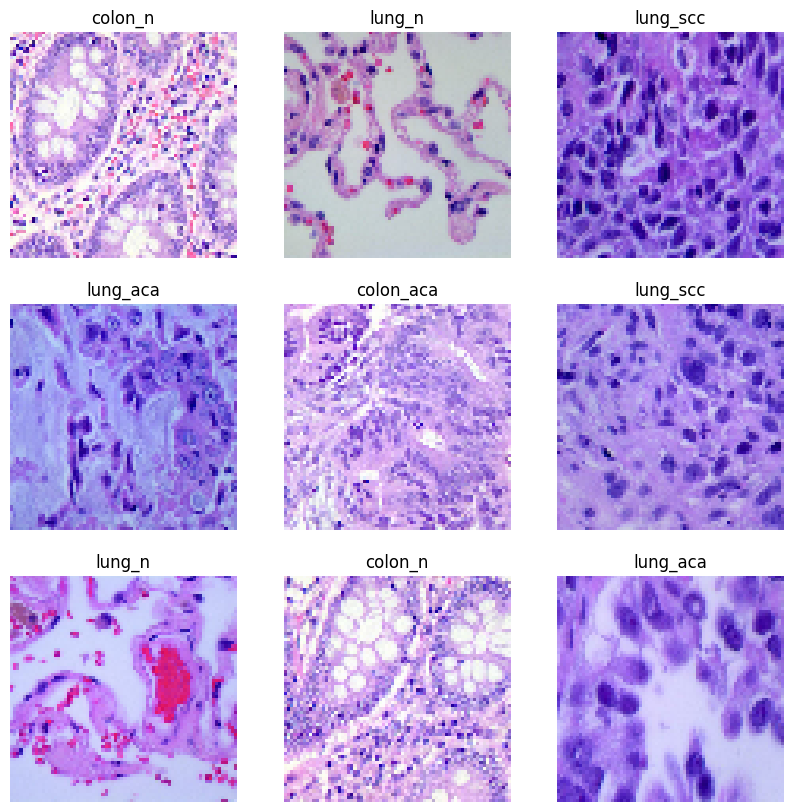

In [37]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [38]:
learning_rate = 0.001
weight_decay = 0.0001
num_classes = 5
input_shape = (72, 72, 3)
batch_size = 16
num_epochs = 10
image_size = 72  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [
    2048,
    1024,
]  # Size of the dense layers of the final classifier


In [39]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
for img,lb in train_ds.take(1):
    break
data_augmentation.layers[0].adapt(img)

In [40]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=keras.activations.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [41]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        input_shape = ops.shape(images)
        batch_size = input_shape[0]
        height = input_shape[1]
        width = input_shape[2]
        channels = input_shape[3]
        num_patches_h = height // self.patch_size
        num_patches_w = width // self.patch_size
        patches = keras.ops.image.extract_patches(images, size=self.patch_size)
        patches = ops.reshape(
            patches,
            (
                batch_size,
                num_patches_h * num_patches_w,
                self.patch_size * self.patch_size * channels,
            ),
        )
        return patches

    def get_config(self):
        config = super().get_config()
        config.update({"patch_size": self.patch_size})
        return config

Image size: 72 X 72
Patch size: 6 X 6
Patches per image: 144
Elements per patch: 108


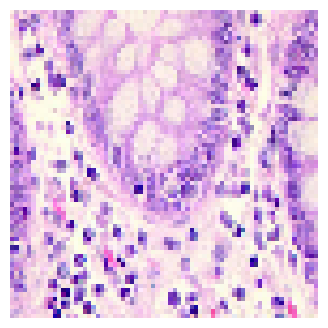

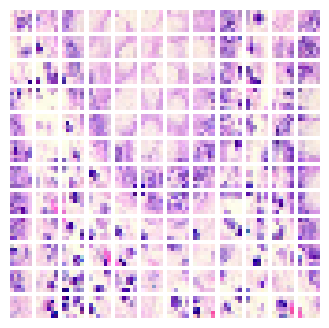

In [42]:
plt.figure(figsize=(4, 4))
for img,lb in train_ds.take(1):
    image = img[0].numpy()

plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = ops.image.resize(
    ops.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = ops.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(ops.convert_to_numpy(patch_img).astype("uint8"))
    plt.axis("off")

In [43]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = ops.expand_dims(
            ops.arange(start=0, stop=self.num_patches, step=1), axis=0
        )
        projected_patches = self.projection(patch)
        encoded = projected_patches + self.position_embedding(positions)
        return encoded

    def get_config(self):
        config = super().get_config()
        config.update({"num_patches": self.num_patches})
        return config

In [44]:
def create_vit_classifier():
    inputs = keras.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 89s 55ms/step - accuracy: 0.6961 - loss: 2.0599 - top-5-accuracy: 1.0000 - val_accuracy: 0.6774 - val_loss: 0.6096 - val_top-5-accuracy: 1.0000
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 58s 53ms/step - accuracy: 0.7734 - loss: 0.5145 - top-5-accuracy: 1.0000 - val_accuracy: 0.8313 - val_loss: 0.4400 - val_top-5-accuracy: 1.0000
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 57s 52ms/step - accuracy: 0.8353 - loss: 0.4296 - top-5-accuracy: 1.0000 - val_accuracy: 0.7238 - val_loss: 0.6685 - val_top-5-accuracy: 1.0000
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 57s 52ms/step - accuracy: 0.7112 - loss: 0.6711 - top-5-accuracy: 1.0000 - val_accuracy: 0.7735 - val_loss: 0.4983 - val_top-5-accuracy: 1.0000
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 57s 52ms/step - accuracy: 0.7214 - loss: 0.6231 - top-5-accuracy: 1.0000 - val_accuracy: 0.6835 - val_loss: 0.6648 - val_top-5-accuracy: 1.0000
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 57s 52ms/step - accuracy: 0.

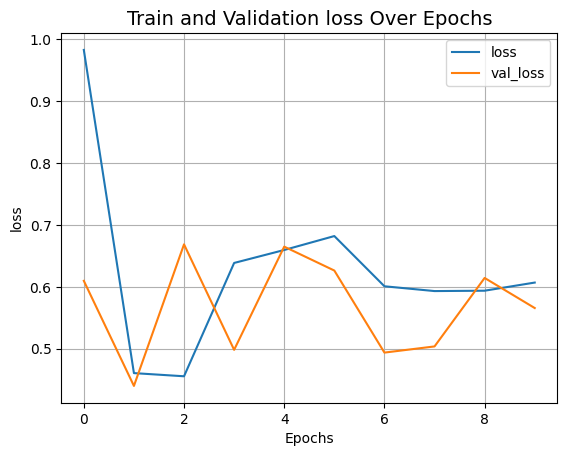

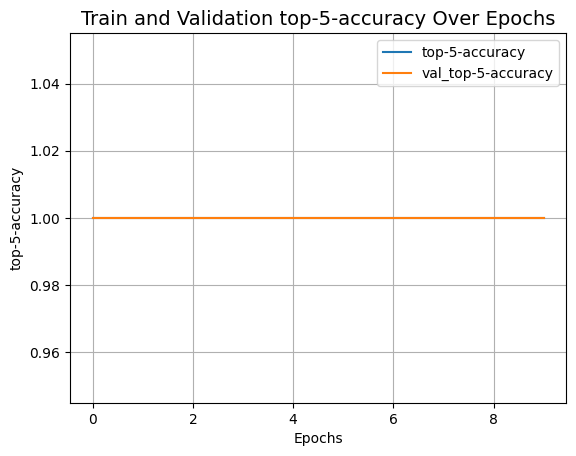

In [45]:
def run_experiment(model):
    optimizer = keras.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "checkpoint.weights.h5"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        train_ds,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_data=val_ds,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(val_ds)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)


def plot_history(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_history("loss")
plot_history("top-5-accuracy")

In [54]:
model = create_vit_classifier()

In [55]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 72, 72, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ data_augmentation   │ (None, 72, 72, 3) │          7 │ input_layer_3[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patches_3 (Patches) │ (None, 144, 108)  │          0 │ data_augmentatio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patch_encoder_2     │ (None, 144, 64)   │     16,192 │ patches_3[0][0]   │
│ (PatchEncoder)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ patch_encoder_2[… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 144, 64)   │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_32 (Add)        │ (None, 144, 64)   │          0 │ multi_head_atten… │
│                     │                   │            │ patch_encoder_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ add_32[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_41 (Dense)    │ (None, 144, 128)  │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_55          │ (None, 144, 128)  │          0 │ dense_41[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_42 (Dense)    │ (None, 144, 64)   │      8,256 │ dropout_55[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_56          │ (None, 144, 64)   │          0 │ dense_42[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_33 (Add)        │ (None, 144, 64)   │          0 │ dropout_56[0][0], │
│                     │                   │            │ add_32[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ add_33[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 144, 64)   │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_34 (Add)        │ (None, 144, 64)   │          0 │ multi_head_atten… │
│                     │                   │            │ add_33[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ add_34[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_43 (Dense)    │ (None, 144, 128)  │      8,320 │ layer_normalizat

 Total params: 21,661,644 (82.63 MB)

 Trainable params: 21,661,637 (82.63 MB)

 Non-trainable params: 7 (32.00 B)

In [56]:
model.load_weights("checkpoint.weights.h5")

# Unseen Test Data

In [49]:
test_predictions = []
actual_labels = []
for img,lb in test_ds:
    t_p = model.predict(img)
    t_s = tf.nn.softmax(t_p,axis=-1)
    t_pred = tf.math.argmax(t_s,axis=-1).numpy()
    test_predictions.append(t_pred)
    actual_labels.append(lb.numpy())
test_predictions = np.concatenate(test_predictions, axis=0)
actual_labels = np.concatenate(actual_labels, axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━

In [50]:
test_predictions

array([3, 2, 2, ..., 0, 1, 1])

In [51]:
actual_labels

array([3, 2, 2, ..., 0, 1, 0], dtype=int32)

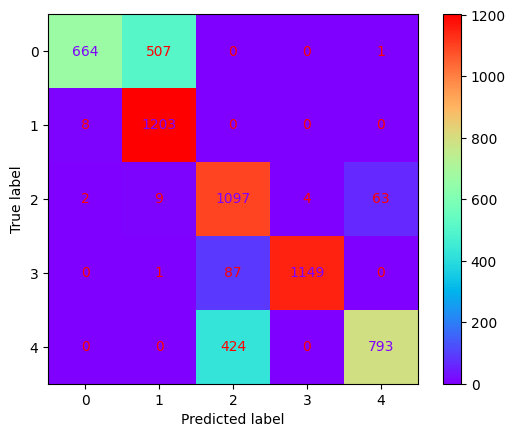

In [52]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
cm = confusion_matrix(actual_labels,test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='rainbow')
plt.grid(False)
plt.show()

In [53]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 26.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=2a57326f83694238b0f18c2815698ffed6414519a91de00c88185d1fae3f797b
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━

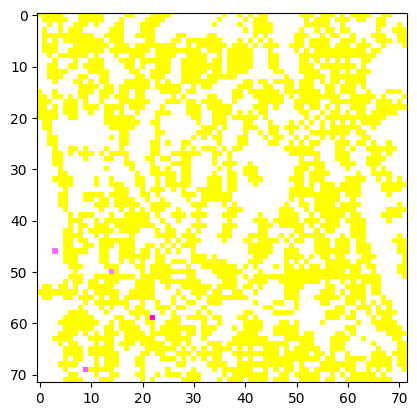

In [57]:
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Initialize explainer
explainer = lime_image.LimeImageExplainer()
# Generate explanation for a single image
# classifier_fn must be the model's predict function
explanation = explainer.explain_instance(
    image.astype('double'),
    model.predict,
    top_labels=5,
    hide_color=0,
    num_samples=1000
)
# Get image and mask for the top prediction
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only=True,
    num_features=5,
    hide_rest=False
)

plt.imshow(mark_boundaries(temp, mask))

In [44]:
x_train, y_train = next(iter(train_ds))
x_train = x_train.numpy()
y_train = y_train.numpy()
x_test, y_test = next(iter(test_ds))
x_test = x_test.numpy()
y_test = y_test.numpy()

In [45]:

!pip install shap==0.40
#!pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.7/371.7 kB 8.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shap: filename=shap-0.40.0-cp312-cp312-linux_x86_64.whl size=518426 sha256=5983e800295f1b259638fd0a90de06608e2f2da26e3e743a01ef0252a81daccb
  Stored in directory: /root/.cache/pip/wheels/01/4c/13/d1735a40705d3180e3f19b339cb4e8982232a48f6b61e7281b
Successfully built shap
  Attempting uninstall: slicer
    Found existing installation: slicer 0.0.8
    Uninstalling slicer-0.0.8:
      Successfully uninstalled slicer-0.0.8
  Attempting uninstall: shap
    Found existing installation: shap 0.50.0
    Uninstalling shap-0.50.0:
      Successfully uninstalled shap-0.50.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 132.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    

In [1]:
x_train

NameError: name 'x_train' is not defined

In [1]:
#shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough #this solves the "shap_ADDV2" problem
import shap
shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough #this solves the "shap_ADDV2" problem
# Select background samples
#from shap.utils import Cohorts
background = x_train[np.random.choice(x_train.shape[0], 10, replace=True)]

background.shape
# Initialize the explainer
explainer = shap.DeepExplainer(model, background)
# Calculate SHAP values for test images
shap_values = explainer.shap_values(x_test[0].reshape(1,72,72,3))

# Visualize explanations
shap.image_plot(shap_values, x_test[:5])


NameError: name 'x_train' is not defined

In [6]:
import shap
explainer = shap.GradientExplainer(model, x_train)
shap_values = explainer.shap_values(x_test)

ImportError: cannot import name 'Cohorts' from 'shap._explanation' (/usr/local/lib/python3.12/dist-packages/shap/_explanation.py)